edwith의 부스트 코스 : "파이토치로 시작하는 딥러닝 기초" 를 바탕으로 작성되었습니다.  
https://www.boostcourse.org/ai214

# MNIST
- MNIST
- Full code : MNIST classifier

## MNIST
MNIST dataset 은 손으로 쓰인 dataset 임. 0~9까지의 숫자이미지로 구성이 되어있음.  
6만장의 이미지와 라벨로 이루어진 training dataset, 1만장의 이미지와 그에 해당하는 레이블로 이루어진 test dataset 이 있음.    

28 * 28 사이즈의 channel 값이 1인 gray scale의 이미지임. 레이블은 one-hot encoded 되지 않음.  
784개의 값들로 이루어진 이미지라고 할 수 있음.  

### torchvision 
PyTorch 에서 사용하는 패키지로 유명한 dataset, 모델 architecture 들, 데이터에 적용될 수 있는 transform(preprocessing) 들로 구성되어 있고, dataset들을 쉽게 읽어올 수 있도록 torchvision.utils 라는 패키지 또한 제공함.  

## Full code : MNIST classifier

### import

In [1]:
import torch 
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import torch.utils
import random

import matplotlib.pyplot as plt

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cpu


In [3]:
random.seed(777)
torch.manual_seed(777)

if device == 'cuda':
    torch.cuda.manual_seed_all(777)

### data load

In [4]:
mnist_train = dsets.MNIST(root='MNIST_data/', train=True, transform=transforms.ToTensor(), download=True)
mnist_test = dsets.MNIST(root='MNIST_data/', train=False, transform=transforms.ToTensor(), download=True)

In [5]:
train_loader = torch.utils.data.DataLoader(mnist_train, batch_size=100, shuffle=True, drop_last=True)
test_loader = torch.utils.data.DataLoader(mnist_test, batch_size=100, shuffle=True, drop_last=True)

### Epoch / Batch size / Iteration
* one **epoch** = one forward pass and one backward pass of all the training examples (training set 전체에 대해 순전파와 역전파가 일어났을때는 1에폭이라고함, training set 전체가 사용되었을때 1에폭)
* **batch size** = the number of training examples in one forward/backward pass. The higher the batch size, the more memory space you'll need. (한번의 forward/backward 에 사용되는 훈련 데이터의 수, 전체 set을 나누어 학습을 진행할때 나누는 batch의 사이즈)
* number of **iterations** = number of passes, each pass using [batch size] number of examples. To be clear, one pass = one forward pass + one backward pass (we do not count the forward pass and backward pass as two different passes). (배치를 몇번 학습에 사용되었는지, 학습에 사용된 횟수)

**Example** : if you have 1000 training example, and your batch size is 500, then it will take 2 iterations to complete 1 epoch.  
1 epoch  = number of training example = batch size * iterations

### Train

In [6]:
class SoftmaxModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(784, 10, bias=True).to(device)
        
    def forward(self, x):
        return self.linear(x)

In [7]:
model = SoftmaxModel()
optimizer = optim.SGD(model.parameters(), lr=0.1)

In [8]:
nb_epochs = 15
for epoch in range(1, nb_epochs + 1):
    avg_cost = 0
    avg_acc = 0
    total_batch = len(train_loader)
    
    for x_train, y_train in train_loader:
        x_train = x_train.view(-1, 28 * 28).to(device)
        y_train = y_train.to(device)
        
        prediction = model(x_train)
        
        cost = F.cross_entropy(prediction, y_train).to(device)
        
        correct_prediction = torch.argmax(prediction, 1) == y_train
        accuracy = correct_prediction.float().mean()
        avg_acc += accuracy/total_batch
        
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()
        
        avg_cost += cost/total_batch
        
    print('Epoch : {:4d}/{}, Cost : {:.6f}, ACC:{:.5f}'.format(epoch, nb_epochs, avg_cost, avg_acc))

Epoch :    1/15, Cost : 0.535469, ACC:0.8677327036857605
Epoch :    2/15, Cost : 0.359274, ACC:0.9007329344749451
Epoch :    3/15, Cost : 0.331188, ACC:0.9077996611595154
Epoch :    4/15, Cost : 0.316578, ACC:0.9118829965591431
Epoch :    5/15, Cost : 0.307158, ACC:0.9143326282501221
Epoch :    6/15, Cost : 0.300181, ACC:0.9162165522575378
Epoch :    7/15, Cost : 0.295130, ACC:0.9181332588195801
Epoch :    8/15, Cost : 0.290852, ACC:0.9189333319664001
Epoch :    9/15, Cost : 0.287417, ACC:0.9197498559951782
Epoch :   10/15, Cost : 0.284380, ACC:0.9202662706375122
Epoch :   11/15, Cost : 0.281825, ACC:0.9217662215232849
Epoch :   12/15, Cost : 0.279801, ACC:0.9218328595161438
Epoch :   13/15, Cost : 0.277809, ACC:0.9227167963981628
Epoch :   14/15, Cost : 0.276154, ACC:0.923149585723877
Epoch :   15/15, Cost : 0.274441, ACC:0.9240496754646301


### Test

In [9]:
with torch.no_grad():  # gradient 계산을 하지 않는 다는 의미 
    x_test = mnist_test.data.view(-1, 28 * 28).float().to(device)
    y_test = mnist_test.targets.to(device)
    
    prediction = model(x_test)
    print(prediction.shape)
    
#     correct_prediction = torch.argmax(prediction, 1) == y_test
    correct_prediction = torch.max(prediction, 1)[1] == y_test
    
    accuracy = correct_prediction.float().mean()
    print("Accuracy : ", accuracy.item())

torch.Size([10000, 10])
Accuracy :  0.8863000273704529


## Visualization

Label :  9
Prediction :  9


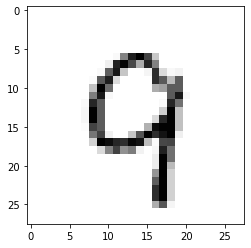

In [26]:
r = random.randint(0, len(mnist_test) - 1)
x_single_data = mnist_test.data[r].view(-1, 28 * 28).float().to(device)
y_single_data = mnist_test.targets[r].to(device)

print('Label : ', y_single_data.item())
single_prediction = model(x_single_data)
print('Prediction : ', torch.argmax(single_prediction, 1).item())

plt.imshow(mnist_test.data[r].view(-1, 28), cmap='Greys', interpolation='nearest')
plt.show()